In [1]:
from modelling import *
from feature_processing import *
from functools import reduce
from model_test import *

In [2]:
from sklearn.naive_bayes import GaussianNB

In [2]:
Xs_raw, ys = get_data_from_sql(target, features_sql,since="2015-01-01")

In [3]:
hour_method = "hcyclic"
month_method = "mcyclic"

In [4]:
Xs = Xs_raw[["latitude","longitude"]].join( 
            process_features(Xs_raw, hour_method=hour_method,
            month_method=month_method) ) 


In [104]:
Xs.head()

,latitude,longitude,0,1,0m,1m,datetime,AIRPORT/AIRCRAFT,ALLEY,ANIMAL HOSPITAL,...,SPORTS ARENA/STADIUM,STREET,TAVERN/LIQUOR STORE,TAXICAB,VACANT LOT/LAND,VEHICLE - OTHER RIDE SERVICE,VEHICLE NON-COMMERCIAL,VEHICLE-COMMERCIAL,WAREHOUSE,YARD
0,41.777575,-87.609520,1.224647e-16,-1.000000,0.866025,5.000000e-01,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,41.856957,-87.730818,2.588190e-01,-0.965926,1.000000,6.123234e-17,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,41.855748,-87.666085,1.224647e-16,-1.000000,1.000000,6.123234e-17,True,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,41.855748,-87.666085,1.224647e-16,-1.000000,1.000000,6.123234e-17,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,41.924836,-87.646317,-7.071068e-01,0.707107,1.000000,6.123234e-17,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from imblearn.over_sampling import SMOTE


In [6]:
X_train, X_test, y_train, y_test = train_test_split(Xs, ys)
ros = SMOTE(ratio="minority")
X_res, y_res = ros.fit_sample(X_train, y_train)

In [8]:
dummy = DummyClassifier(strategy="most_frequent")
forest = RandomForestClassifier(n_estimators = 100, n_jobs = 3, max_depth = 18)

In [9]:
dummy.fit(X_res, y_res)
forest.fit(X_res, y_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=18, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=3,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [10]:
#dpred = dummy.predict(X_test)
fpred = forest.predict(X_test)

In [11]:
dpred = np.array([False]*len(X_test))

In [12]:
dacc = accuracy_score(y_test, dpred)
facc = accuracy_score(y_test, fpred)
dp = precision_recall_fscore_support(y_test, dpred)
fp = precision_recall_fscore_support(y_test, fpred)

In [14]:
print(dacc, facc)

0.5804873466767904 0.6246663483440702


In [15]:
fp

(array([0.67853299, 0.55192081]),
 array([0.67159751, 0.55972684]),
 array([0.67504744, 0.55579642]),
 array([74159, 53594]))

In [58]:
fp

(array([0.68322943, 0.55900621]),
 array([0.6942353 , 0.54631377]),
 array([0.6886884 , 0.55258712]),
 array([207591, 147278]))

In [40]:
f1p

(array([0.64759047, 0.63393434]),
 array([0.8608273 , 0.33971129]),
 array([0.73913682, 0.44236763]),
 array([207591, 147278]))

In [42]:
ada.fit(X_train, y_train)
ada1.fit(X_train, y_train)

KeyboardInterrupt: 

In [43]:
apred = ada.predict(X_test)

In [59]:
accuracy_score(y_test, fpred)

0.6328447962487566

In [46]:
from sklearn.metrics import confusion_matrix

In [63]:
import bokeh

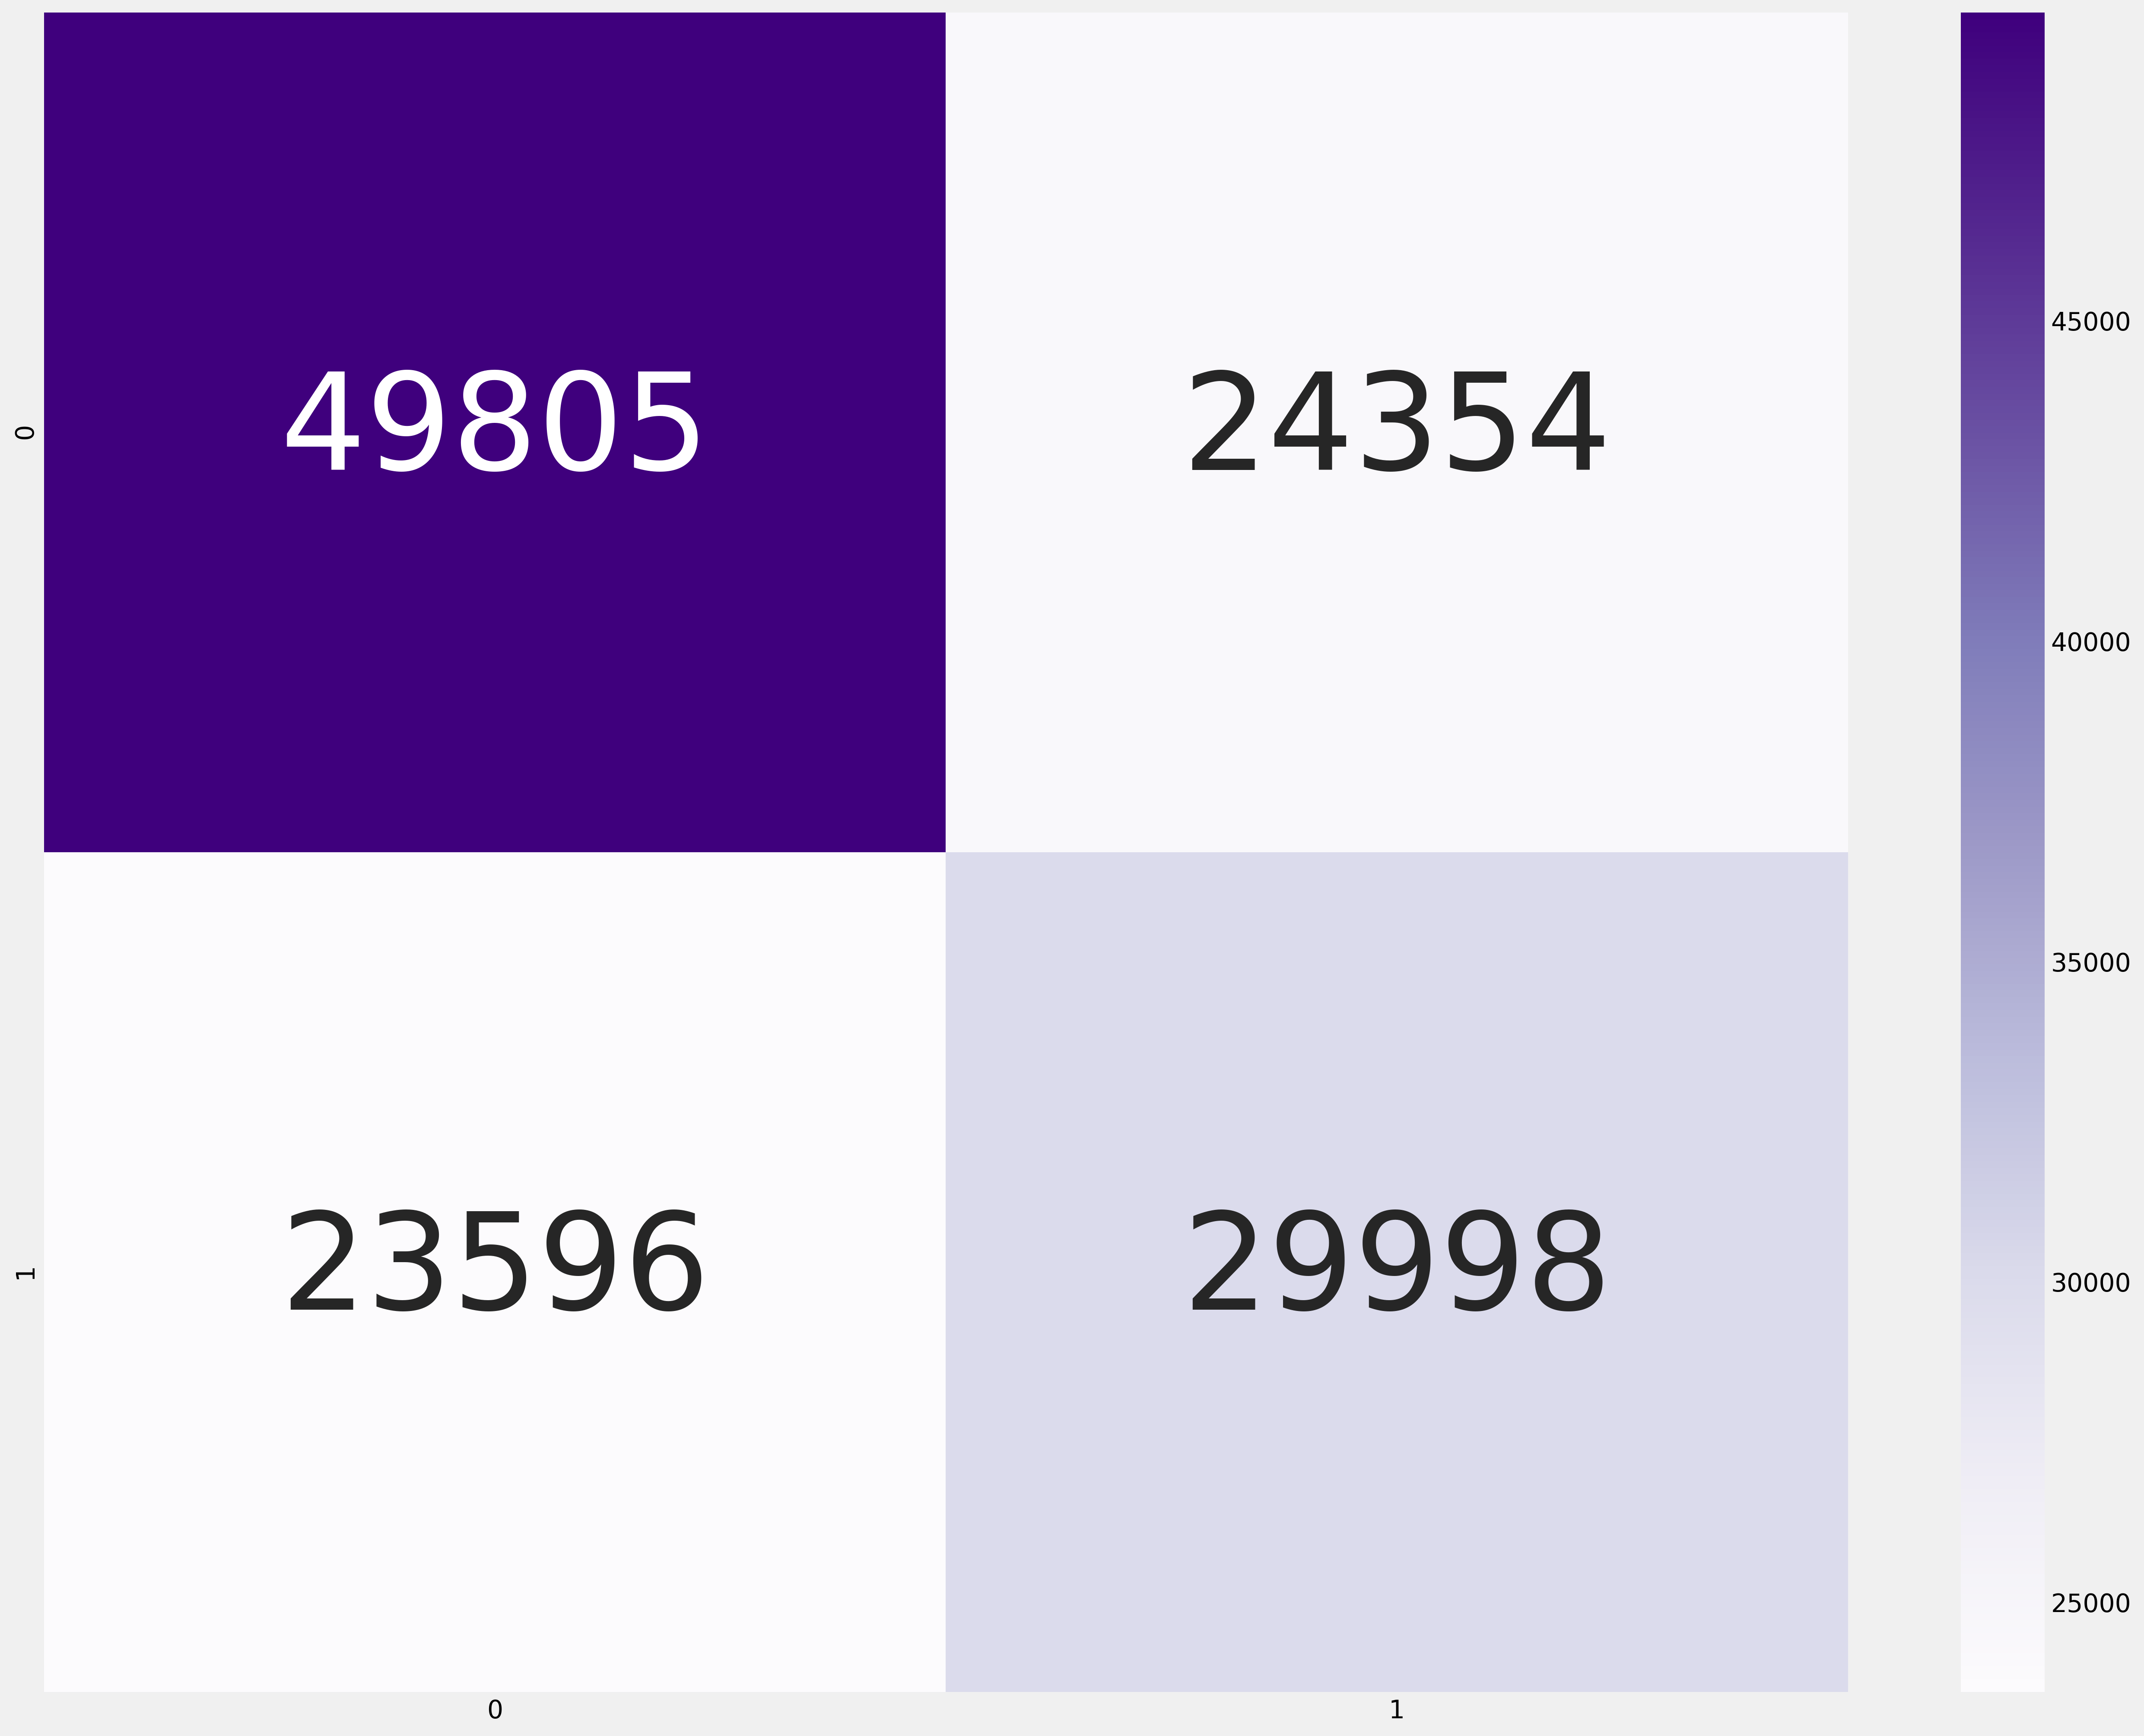

In [32]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(20,16), dpi=300)
sns.heatmap(confusion_matrix(y_test, fpred), annot=True, cmap="Purples", annot_kws={"size":75}, fmt="g")

In [96]:
tr = DecisionTreeClassifier(class_weight="balanced")
tr.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [97]:
tpred = tr.predict(X_test)

In [98]:
accuracy_score(y_test, tpred)

0.5796662463995408

In [9]:
kimport pickle

In [19]:
empty = Xs.head(4)


In [20]:
for col in empty.columns:
    empty[col] = False

In [21]:
empty

,latitude,longitude,0,1,0m,1m,datetime,AIRPORT/AIRCRAFT,ALLEY,ANIMAL HOSPITAL,...,SPORTS ARENA/STADIUM,STREET,TAVERN/LIQUOR STORE,TAXICAB,VACANT LOT/LAND,VEHICLE - OTHER RIDE SERVICE,VEHICLE NON-COMMERCIAL,VEHICLE-COMMERCIAL,WAREHOUSE,YARD
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [35]:
lat_df = Xs.head(4)[["latitude","longitude"]]
lat_df.combine_first(empty)
lat_df

,latitude,longitude
0,41.777575,-87.609520
1,41.856957,-87.730818
2,41.855748,-87.666085
3,41.855748,-87.666085


In [32]:
pd.concat([lat_df, empty], axis=1, join="left")

ValueError: Only can inner (intersect) or outer (union) join the other axis

In [23]:
with open("empty_df.pkl","wb") as picklefile:
    pickle.dump(empty, picklefile)

In [17]:
Xs.T

,0,1,2,3,4,5,6,7,8,9,...,511000,511001,511002,511003,511004,511005,511006,511007,511008,511009
latitude,41.7776,41.857,41.8557,41.8557,41.9248,41.899,41.9678,42.0021,41.83,41.9285,...,41.9413,41.7508,41.935,41.917,41.8661,41.878,41.9074,41.8832,41.7072,41.8635
longitude,-87.6095,-87.7308,-87.6661,-87.6661,-87.6463,-87.7637,-87.6576,-87.8116,-87.61,-87.7759,...,-87.7453,-87.6003,-87.7214,-87.742,-87.66,-87.7617,-87.6884,-87.625,-87.6238,-87.6525
0,1.22465e-16,0.258819,1.22465e-16,1.22465e-16,-0.707107,-0.866025,0.866025,-0.5,0.5,-0.707107,...,-0.258819,0.5,0.866025,0,0.5,-0.707107,1.22465e-16,0.258819,-0.258819,0
1,-1,-0.965926,-1,-1,0.707107,0.5,-0.5,-0.866025,0.866025,0.707107,...,-0.965926,-0.866025,-0.5,1,-0.866025,0.707107,-1,-0.965926,-0.965926,1
0m,0.866025,1,1,1,1,0.866025,0.866025,0.866025,0.866025,0.866025,...,0,0,0,0,0,0,0,0.866025,0.866025,-0.5
1m,0.5,6.12323e-17,6.12323e-17,6.12323e-17,6.12323e-17,-0.5,-0.5,-0.5,-0.5,-0.5,...,1,1,1,1,1,1,1,-0.5,-0.5,-0.866025
datetime,False,False,False,False,False,True,True,False,False,True,...,True,True,True,True,True,True,False,True,True,True
AIRPORT/AIRCRAFT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ALLEY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ANIMAL HOSPITAL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
if True:
    X_train_us, X_test_us, y_train, y_test = \
            train_test_split(Xs, ys, random_state=4, stratify=ys)
    ssc = StandardScaler()
    X_train = ssc.fit_transform(X_train_us)
    X_test = ssc.transform(X_test_us)



In [41]:
gnb = GaussianNB()

In [44]:
from sklearn.tree import export_graphviz
forest_scores = np.array([est.score(X_test, y_test) for est in models[0].estimators_])
forest_best = np.argmax(forest_scores)

In [45]:
export_graphviz(models[0].estimators_[forest_best],out_file='best_tree.dot', max_depth=4, feature_names=Xs.columns)


In [47]:
ypred2 = models[0].estimators_[forest_best].predict(X_test)

In [61]:
from sklearn.metrics import confusion_matrix

In [55]:
a = {}
a.d

In [70]:
confusion_matrix(np.array(y_test).reshape(-1,), ypred2)

ValueError: Mix of label input types (string and number)

#### ypred2.shape

In [43]:
models[0].fit(X_train, y_train)
train_pred = models[0].predict(X_train)
test_pred = models[0].predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [27]:
print("Training accuracy:", accuracy_score(y_train, train_pred))
print("Testing  accuracy:", accuracy_score(y_test,  test_pred ))

Training accuracy: 0.22894037160443254
Testing  accuracy: 0.22502798368727153


In [28]:
print("Training scores:", precision_recall_fscore_support(y_train, train_pred))
print("Testing  scores:", precision_recall_fscore_support(y_test,  test_pred ))

Training scores: (array([0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.22651361, 0.        , 0.        ,
       0.64806435, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.84090909, 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.88636364]), array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.29485081e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.99560022e-01,
       0.00000000e+00, 0.00000000e+00, 2.08576052e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.68048144e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.05120726e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.06907895e-03]), array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.25889092e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.69331733e-01,
       0.00000000

In [ ]:
from sklearn.tree import export_graphviz
forest_scores = np.array([est.score(X_test, y_test) for est in models[0].estimators_])
forest_best = np.argmax(forest_scores)
export_graphviz(models[0].estimators_[forest_best],out_file='best_tree.dot', max_depth=4, feature_names=X_col[1:])
!dot -Tpng rsmpl_best_tree.dot -o best_tree.png